# Resources and (hopefully helpful) suggestions for the coding exercise


It should not come as a shock that the coding exercise is aligned with the content of the course and the homework.


Given that alignment, it is highly likely that code from the notebooks and homeworks would be helpful, and you should aim to use the code you have already written or learned about to help you make progress more efficiently.

For example, the first coding exercise involves solving ODEs and plotting solutions. We have already seen code for those purposes, and you should re-use it intelligently. One way to do that is make your own code libraries and import the functions you wish to use. 

Let's look at doing that with the ODE solver we looked at in class. The essential functions are `euler_step`, `rk2_step`, and `rk_solve`. Grabbing those functions and saving them in a file (with a "preamble" to import necessary pakages like `numpy`), you can produce a file similar to `diy_ode.py`. __When you have completed your homework, you should add your `rk4_step` function to the file and modify `rk_solve` to call it.__ If you save that file in the same directory as your notebook, you can then just execute the following line to make the functions available for use:

`from diy_ode import *`

___Note:___ _If you modify the contents of a python file, you may need to restart your kernel to get the new version to import reliably._

Similarly, it would be nice to be able to create plots without having to plug in multiple lines of code, so the file `simple_plot.py` includes the functions `arrayplot` (for plotting a 1D array of ordinate values vs. a 1D array of abscissa values) and `multiarrayplot` (for plotting the components of a 2D array vs. a 1D array of abscissa values).

So you might have a standard "header" that performs your favorite "magic" (e.g. to make plots appear in the notebook) and loads your "go to" packages.

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [53]:
import numpy as np
from diy_ode import *
from simple_plot import *
np.set_printoptions(precision=2)

As a simple check that the functions were loaded, is to use the question mark to request info on one of the functions (which should return the infom from the docstring):

In [3]:
?rk_solve

Signature: rk_solve(f, y0, t, order=2)
Docstring:
Runge-Kutta solver for systems of 1st order ODEs

Args:
    f: name of right-hand side function that gives rate of change of y
    y0: numpy array of initial float values of dependent variable
    t: numpy array of float values of independent variable
    order: int order of RK solver with allowed values [1,2,4]
    
Returns:
    y: 2D numpy array of float values of dependent variable
File:      c:\users\storti\documents\me535_w2020\code\diy_ode.py
Type:      function


That looks good, so let's run a quick test and plot the results to make sure that `simple_plot` loaded properly too. In particular, let's use `rk_solve` to compute a numerical solution of the ODE from the coding exercise. Note the use of the `lambda` function to specify the details of the first order system:

In [54]:
n = 25
beta = 10
t = np.linspace(0,1,n)
y0 = np.array([1,0])

sol = rk_solve(lambda y,x : np.array([ y[1], -beta*y[0] -  x*y[1] ]), y0, t)
sol.T[0]

array([ 1.  ,  0.99,  0.97,  0.92,  0.86,  0.79,  0.7 ,  0.61,  0.5 ,
        0.39,  0.27,  0.15,  0.02, -0.1 , -0.21, -0.32, -0.42, -0.51,
       -0.59, -0.66, -0.71, -0.75, -0.77, -0.78, -0.78])

Let's plot the results using the `arrayplot` function from the `simple_plot.py` file.

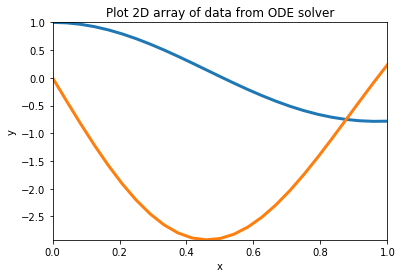

In [55]:
arrayplot(t,sol, axis_range='automatic', titlestring="Plot 2D array of data from ODE solver")

To plot the data associated with select indices,  use `indexplot` function.

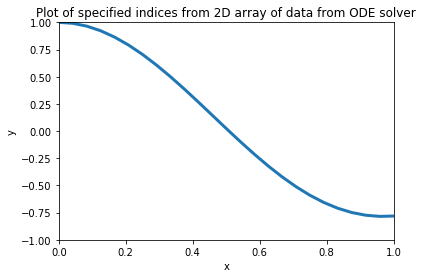

In [56]:
indexplot(t,sol, indices=[0], titlestring="Plot of specified indices from 2D array of data from ODE solver")

So we have some basic tools for simulating and plotting and we are ready for the next steps: computing the solution with a python library function so we can compare with the results from our `rk_solve` code.  

How should that step be accomplished? An approach that can often be efficient is to find similar sample code that we can modify to meet our current goal. The typical first step is to enter a keyword set such as "python differential equation solver" into your favorite search engine to find documentation or sample code. Near the top of the list of search results, you will likely find a link to the documentation for `scipy.integrate.odeint`, and at the top of that page you will find a link re-directing you to `scipy.integrate.solve_ivp`. At the bottom of that documentation page, you will see the following snippet of sample code:

```
from scipy.integrate import solve_ivp
def exponential_decay(t, y): return -0.5 * y
sol = solve_ivp(exponential_decay, [0, 10], [2, 4, 8])
```

Let's plug that snippet into a code cell to test it out and plot the results:

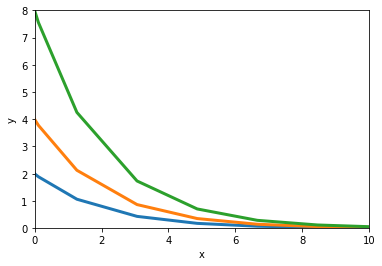

In [57]:
from scipy.integrate import solve_ivp
def exponential_decay(t, y): return -0.5 * y
sol = solve_ivp(exponential_decay, [0, 10], [2, 4, 8])
arrayplot(sol.t, sol.y.T)

That looks good but, before we go on, let's note that we can do the same thing using a lambda function as the first argument instead a defining a named function:

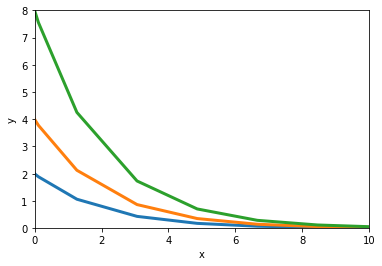

In [58]:
sol = solve_ivp(lambda t,y : -0.5 * y, [0, 10], [2, 4, 8])
arrayplot(sol.t, sol.y.T)

Now let's adapt it to our system of ODEs. Copy and paste the code snippet, and modify the function that defines the rates. Since our ODEs include the parameter $\beta$, remember to assign values for $\beta$, the domain, and the initial conditions before solving. Here is a version using a lambda function:

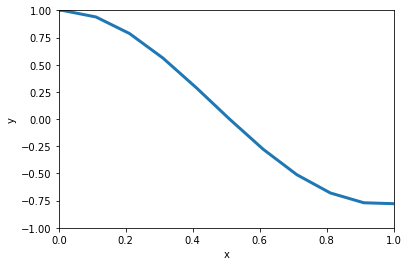

In [59]:
beta = 10
x_span = np.array([0,1])
y0 = np.array([1,0])
sol = solve_ivp(lambda x,y : np.array([ y[1], -beta*y[0] - x*y[1] ]), [0, 10], y0, max_step=1e-1)
arrayplot(sol.t, sol.y[0], axis_range=[0,1,-1,1] )

And here is a version with with a named function to specify the rates:

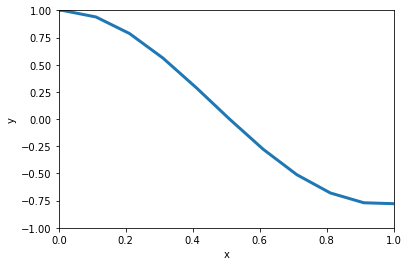

In [60]:
beta = 10
x_span = np.array([0,1])
y0 = np.array([1,0])
def rates(x,y):
    return np.array([ y[1], -beta*y[0] - x*y[1] ])
sol = solve_ivp(rates, [0, 10], y0, max_step=1e-1)
arrayplot(sol.t, sol.y[0], axis_range=[0,1,-1,1] )

If you've been reading the notebooks, you will know that example code using a solver from a standard library is also available in the latest version of the Ch. 7 notebook.

Now that we can solve and plot, let's put the solver and plotter in a loop with some different beta values to get a feel for how the solutions behave and the range of $\beta$ values for the first few eigenfunctions (solutions where the boundary condition $y(1)=0$ is satisfied).

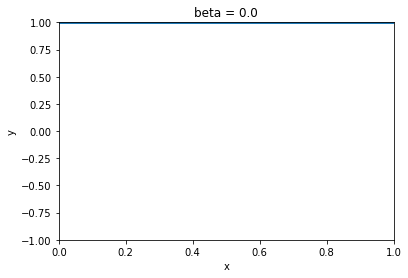

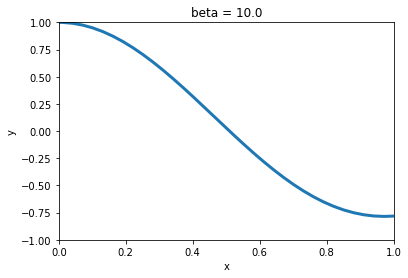

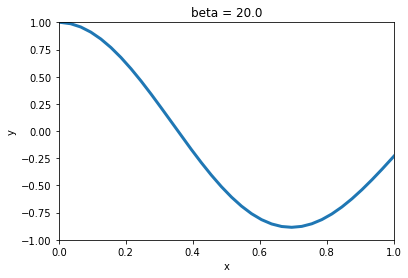

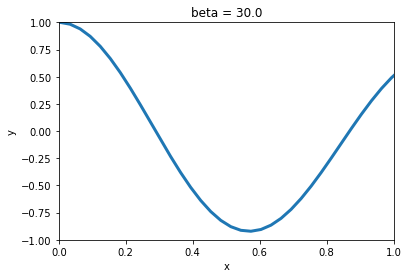

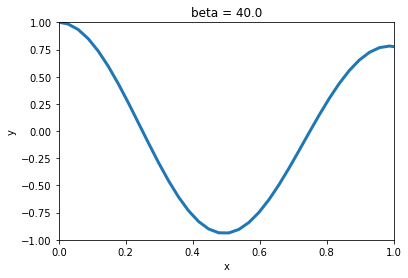

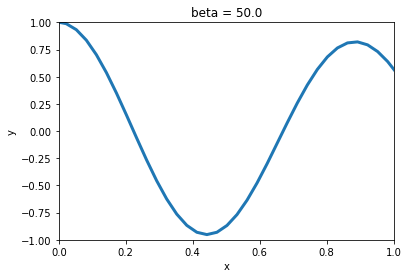

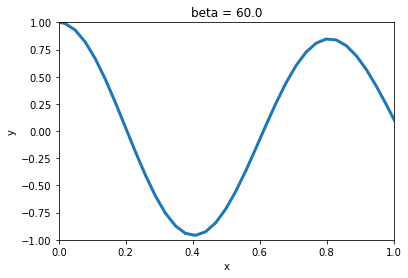

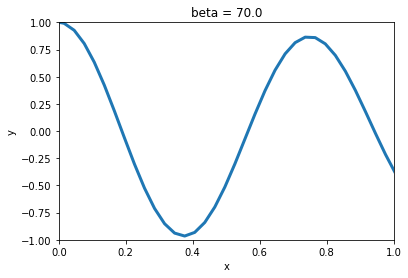

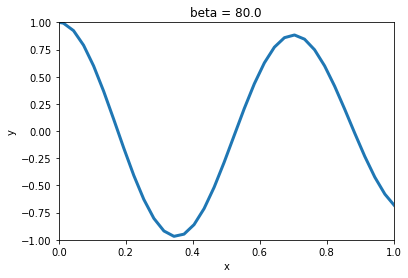

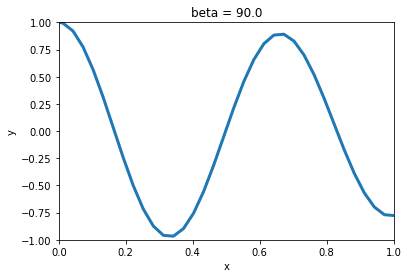

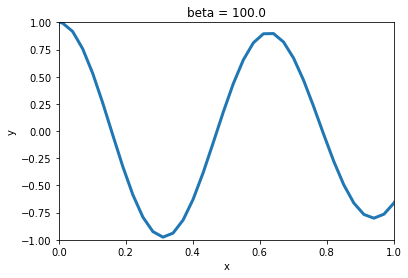

In [61]:
for beta in np.linspace(0,100,11):
    sol = solve_ivp(rates, [0, 10], y0, max_step=3e-2)
    arrayplot(sol.t, sol.y[0], axis_range=[0,1,-1,1], titlestring="beta = " + str(beta) )

The value of the solution at the right side ($x=1$) appears to change sign in the intervals $\beta \in \{[0,10], [20,30], [60, 70] \}$, so we can search in the range $\beta \in [0,100]$ and find several eigenvalues and eigenfunctions.

We also see that to find the even/odd modes, $y(1)>0$ tells us to increase/decrease $\beta$ respectively.

Now we are ready to use a bisection code to home in on the eigenvalues and eigenvectors. Again, this is something for which sample code is available in the most recent Ch. 7 notebook. Here is the code for finding the modes for the linear oscillator equation:

```
fig, ax = plt.subplots(figsize=(16,10),facecolor='white',dpi=80)

beta_start = n0     # beginning value of beta
betas = np.zeros((5,))
for modes in range(5):  # begin mode loop
    beta = beta_start   # initial value of eigenvalue beta
    dbeta = n0/100      # default step size in beta
    for m in range(1000):   # begin convergence loop for beta
        sol = solve_ivp(lambda xp,x0: shoot2(xp,x0,n0,beta),xspan,y0,max_step=xstep,method='RK45')
        y = sol.y
        t = sol.t
        if np.abs(y[0,-1]-0) < tol: #if y(1) is within tolerance, print, save, and break out of loop
            print("Beta Value:",beta)
            betas[modes] = beta;
            break
        if (-1)**modes * y[0,-1] > 0:#if y(1) is positive/negative, decrease beta for even/odd modes
            beta -= dbeta
        else: # otherwise beta value is too small, so bisect (increase by half previous increment)
            beta += dbeta/2
            dbeta *= 0.5
    beta_start=beta-0.1 #after finding a mode, decrease the starting value for finding the next mode
    norm = np.trapz(y[0,:]*y[0,:],x=t) #compute the integral of y**2 for normalization
    ax.plot(t,y[0,:]/np.sqrt(norm),colors[modes]) #normalize and plot

ax.set(title="Eigenfunctions",xlabel="x",ylabel="y");
legend_str = ('$\\beta_{} - {:2.2f}$'.format(n,b) for n,b in enumerate(betas,1))
plt.legend(list(legend_str));
```

Plug this into a code cell and edit to meet the current needs. (Note that the solver call will be simply `solve_ivp` because we imported the function using `from scipy.integrate import solve_ivp`).

Beta Value: 3.0 Residual =  3.95444961498459e-13
Beta Value: 22.78359375 Residual =  -6.0898473802709074e-05
Beta Value: 62.26640625 Residual =  -2.775847392326447e-06
Beta Value: 121.48359375000001 Residual =  -4.8517165883439455e-05


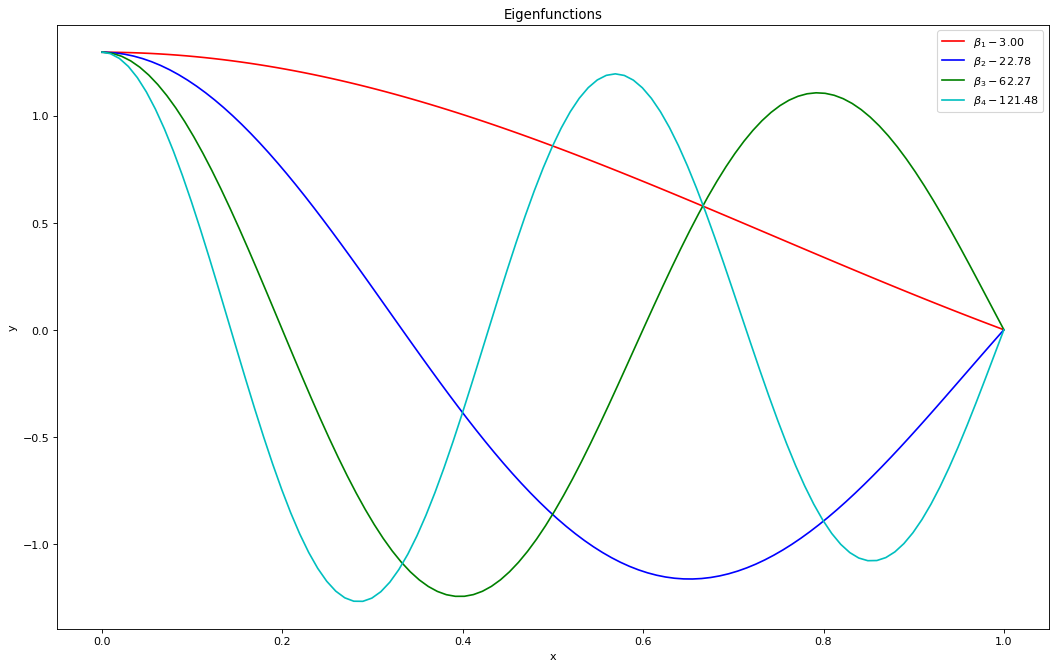

In [62]:
fig, ax = plt.subplots(figsize=(16,10),facecolor='white',dpi=80)
colors=['r','b','g','c','m','k'] # eigenfunction colors to be used in plotting routine

x_span = np.array([0,1])
y0 = np.array([1,0])
beta_start = 0     # beginning value of beta
n = 4
betas = np.zeros((n,))
tol = 1e-4
for modes in range(n):  # begin mode loop
    beta = beta_start   # initial value of eigenvalue beta
    dbeta = -2      # default step size in beta
    for m in range(1000):   # begin convergence loop for beta
        sol = solve_ivp(lambda x, y : np.array([y[1], -beta*y[0] - x*y[1]]),x_span,y0,max_step=1e-2,method='RK45')
        y = sol.y
        t = sol.t
        if np.abs(y[0,-1]-0) < tol: #if y(1) is found within tolerance, print and save the value and break out of loop
            print("Beta Value:",beta, "Residual = ", y[0,-1])
            betas[modes] = beta;
            break
        if (-1)**modes * y[0,-1] > 0:#if y(1) is positive/negative, decrease beta (increase frequency) for even/odd modes
            beta -= dbeta
        else: # oterwise the beta value is too small, so bisect (increase by half the previous increment)
            beta += dbeta/2
            dbeta *= 0.5
    beta_start=beta+0.1 #after finding a mode, decrease the starting value for finding the next mode
    #norm = np.trapz(y[0,:]*y[0,:],x=t) #compute the integral of y**2 for normalization
    #ax.plot(t,y[0,:]/np.sqrt(norm),colors[modes]) #normalize and plot
    ax.plot(t,y[0,:]/np.sqrt(norm),colors[modes]) #plot

ax.set(title="Eigenfunctions",xlabel="x",ylabel="y");
legend_str = ('$\\beta_{} - {:2.2f}$'.format(n,b) for n,b in enumerate(betas,1))
plt.legend(list(legend_str));

Hopefully this will help to facilitate progress, and we'll look at details of the direct solve approach next week.